In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [2]:
IMAGE_SIZE = 640
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 2

In [101]:
import pandas as pd

# Read the CSV file for train dataset
train_csv_file = 'baggage/train/_classes.csv'
train_df = pd.read_csv(train_csv_file)

# Read the CSV file for validation dataset
val_csv_file = 'baggage/valid/_classes.csv'
val_df = pd.read_csv(val_csv_file)

# Read the CSV file for test dataset
test_csv_file = 'baggage/test/_classes.csv'
test_df = pd.read_csv(test_csv_file)

#train_df = train_df.iloc[:2000]
#val_df = val_df.iloc[:200]

In [102]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()
val_df.columns = val_df.columns.str.strip()

In [103]:
val_df.columns

Index(['filename', 'Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench'], dtype='object')

In [104]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 640
BATCH_SIZE = 32
TRAIN_LIMIT = 2000


# Set the paths to the folders containing the images
train_folder = 'baggage/train'
test_folder = 'baggage/test'
val_folder = 'baggage/valid'

# Create an ImageDataGenerator instance with rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow from dataframe using the ImageDataGenerator for train dataset
train_df = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_folder,
    x_col="filename",  # Column name for the image filenames
    y_col=["Gun", "Knife", "Pliers", "Scissors", "Wrench"],  # Column names for the labels
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw",  # Set class_mode to "raw" for multi-label classification
    shuffle=True
)

# Flow from dataframe using the ImageDataGenerator for test dataset
test_df = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_folder,
    x_col="filename",  # Column name for the image filenames
    y_col=["Gun", "Knife", "Pliers", "Scissors", "Wrench"],  # Column names for the labels
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw",  # Set class_mode to "raw" for multi-label classification
    shuffle=False  # No need to shuffle the test dataset
)

# Flow from dataframe using the ImageDataGenerator for validation dataset
val_df = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_folder,
    x_col="filename",  # Column name for the image filenames
    y_col=["Gun", "Knife", "Pliers", "Scissors", "Wrench"],  # Column names for the labels
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="raw",  # Set class_mode to "raw" for multi-label classification
    shuffle=True
)



# Convert DataFrameIterator to a Dataset for train dataset
train_ds = tf.data.Dataset.from_generator(
    lambda: ((x, y) for (x, y) in train_df),
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 5), dtype=tf.float32)  # Adjust the shape based on the number of labels
    )
)

# Convert DataFrameIterator to a Dataset for test dataset
test_ds = tf.data.Dataset.from_generator(
    lambda: ((x, y) for (x, y) in test_df),
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 5), dtype=tf.float32)  # Adjust the shape based on the number of labels
    )
)

# Convert DataFrameIterator to a Dataset for validation dataset
val_ds = tf.data.Dataset.from_generator(
    lambda: ((x, y) for (x, y) in val_df),
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 5), dtype=tf.float32)  # Adjust the shape based on the number of labels
    )
)

Found 5806 validated image filenames.
Found 829 validated image filenames.
Found 1660 validated image filenames.


In [105]:
print(len(train_df))
print(len(val_df))

182
52


In [106]:
k=0
for images, labels in train_ds:
    
    print('Image batch shape:', images.shape)
    print('Label batch shape:', labels.shape)
    
    # Visualize or perform any other operations on the image and label batches
#print(k)    
    break  # Print only the first batch

Image batch shape: (32, 640, 640, 3)
Label batch shape: (32, 5)


In [107]:
import matplotlib.pyplot as plt

# Create a list of class names
class_names = ["Gun", "Knife", "Pliers", "Scissors", "Wrench"]


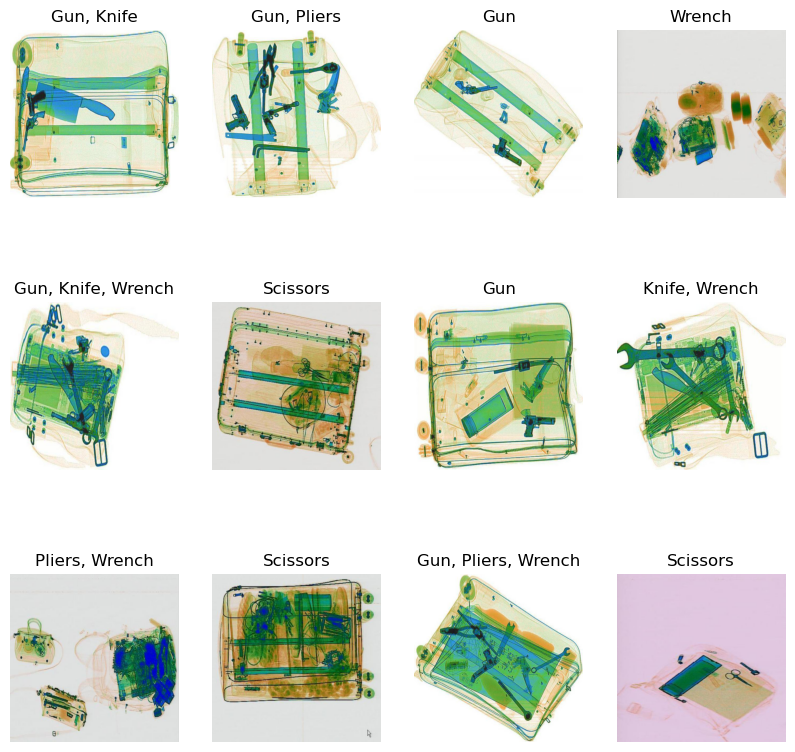

In [108]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        # Convert the image tensor to a numpy array
        image = np.array(image_batch[i])
        
        # Rescale the pixel values from [0, 1] to [0, 255]
        image = (image * 255).astype(np.uint8)
        
        plt.imshow(image)
        
        labels = np.array(label_batch[i])
        class_labels = [class_names[j] for j, label in enumerate(labels) if label != 0]
        
        plt.title(', '.join(class_labels))
        plt.axis("off")


In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = models.Sequential([
    #resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'sigmoid')
    
])

model.build(input_shape = input_shape)

In [109]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model2 = models.Sequential([
    #resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'sigmoid')
    
])

model2.build(input_shape = input_shape)

In [110]:
#model = Sequential()
#
#model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(5, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 319, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 158, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 78, 78, 64)       0

In [111]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 319, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 158, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 78, 78, 64)      

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
#test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
# Define the number of steps per epoch
train_steps_per_epoch = len(train_df)
val_steps_per_epoch = len(val_df)
# Train the model
history = model.fit(
    train_ds,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=val_ds,
    validation_steps=val_steps_per_epoch,
    batch_size=BATCH_SIZE,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 583s 9s/step - loss: 0.5182 - accuracy: 0.4820 - val_loss: 0.4390 - val_accuracy: 0.6200
Epoch 2/10
63/63 [==============================] - 588s 9s/step - loss: 0.4407 - accuracy: 0.6550 - val_loss: 0.4118 - val_accuracy: 0.6250
Epoch 3/10
63/63 [==============================] - 490s 8s/step - loss: 0.4076 - accuracy: 0.6905 - val_loss: 0.4191 - val_accuracy: 0.6050
Epoch 4/10
63/63 [==============================] - 460s 7s/step - loss: 0.3971 - accuracy: 0.7055 - val_loss: 0.3835 - val_accuracy: 0.6750
Epoch 5/10
63/63 [==============================] - 529s 8s/step - loss: 0.3851 - accuracy: 0.7205 - val_loss: 0.4289 - val_accuracy: 0.6600
Epoch 6/10
63/63 [==============================] - 475s 8s/step - loss: 0.3658 - accuracy: 0.7155 - val_loss: 0.4091 - val_accuracy: 0.6650
Epoch 7/10
63/63 [==============================] - 443s 7s/step - loss: 0.3464 - accuracy: 0.7415 - val_loss: 0.4474 - val_accuracy: 0.6700
Epoch 8/10
63

In [113]:
# Define the number of steps per epoch
train_steps_per_epoch = len(train_df)
val_steps_per_epoch = len(val_df)
# Train the model
history2 = model2.fit(
    train_ds,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=val_ds,
    validation_steps=val_steps_per_epoch,
    batch_size=BATCH_SIZE,
    epochs=50
)


Epoch 1/50
182/182 [==============================] - 1255s 7s/step - loss: 0.4695 - accuracy: 0.5682 - val_loss: 0.3929 - val_accuracy: 0.7181
Epoch 2/50
182/182 [==============================] - 1260s 7s/step - loss: 0.3901 - accuracy: 0.7036 - val_loss: 0.3727 - val_accuracy: 0.7102
Epoch 3/50
182/182 [==============================] - 1249s 7s/step - loss: 0.3655 - accuracy: 0.7089 - val_loss: 0.3607 - val_accuracy: 0.7253
Epoch 4/50
182/182 [==============================] - 1247s 7s/step - loss: 0.3436 - accuracy: 0.7342 - val_loss: 0.3505 - val_accuracy: 0.7265
Epoch 5/50
182/182 [==============================] - 1262s 7s/step - loss: 0.3132 - accuracy: 0.7530 - val_loss: 0.3461 - val_accuracy: 0.7157
Epoch 6/50
182/182 [==============================] - 1287s 7s/step - loss: 0.2720 - accuracy: 0.7887 - val_loss: 0.3607 - val_accuracy: 0.7066
Epoch 7/50
182/182 [==============================] - 1247s 7s/step - loss: 0.2372 - accuracy: 0.8078 - val_loss: 0.3123 - val_accuracy:

In [130]:
new_test_ds = test_ds.take(5)

In [93]:
scores = model.evaluate(new_test_ds)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


5/5 [==============================] - 7s 1s/step - loss: 0.4308 - accuracy: 0.7063
Test loss: 0.43082720041275024
Test accuracy: 0.706250011920929


In [131]:
scores = model2.evaluate(new_test_ds)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


5/5 [==============================] - 8s 1s/step - loss: 0.7809 - accuracy: 0.8000
Test loss: 0.7808914184570312
Test accuracy: 0.800000011920929


In [132]:
images = []
labels = []

# Iterate over the dataset and extract images and labels
for image, label in new_test_ds:
    images.append(image)
    labels.append(label)

# Concatenate the image tensors along the batch dimension
images = tf.concat(images, axis=0)

# Concatenate the label tensors along the batch dimension
labels = tf.concat(labels, axis=0)

# Print the shapes of the images and labels tensors
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (160, 640, 640, 3)
Labels shape: (160, 5)


In [95]:
# Get the first batch of images and labels from test_ds
#images, labels = next(iter(new_test_ds))

In [96]:
proba = model.predict(images)

5/5 [==============================] - 7s 1s/step


In [133]:
proba = model2.predict(images)

5/5 [==============================] - 8s 2s/step


In [134]:
test_images = []
test_labels = []

for images, labels in new_test_ds:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)


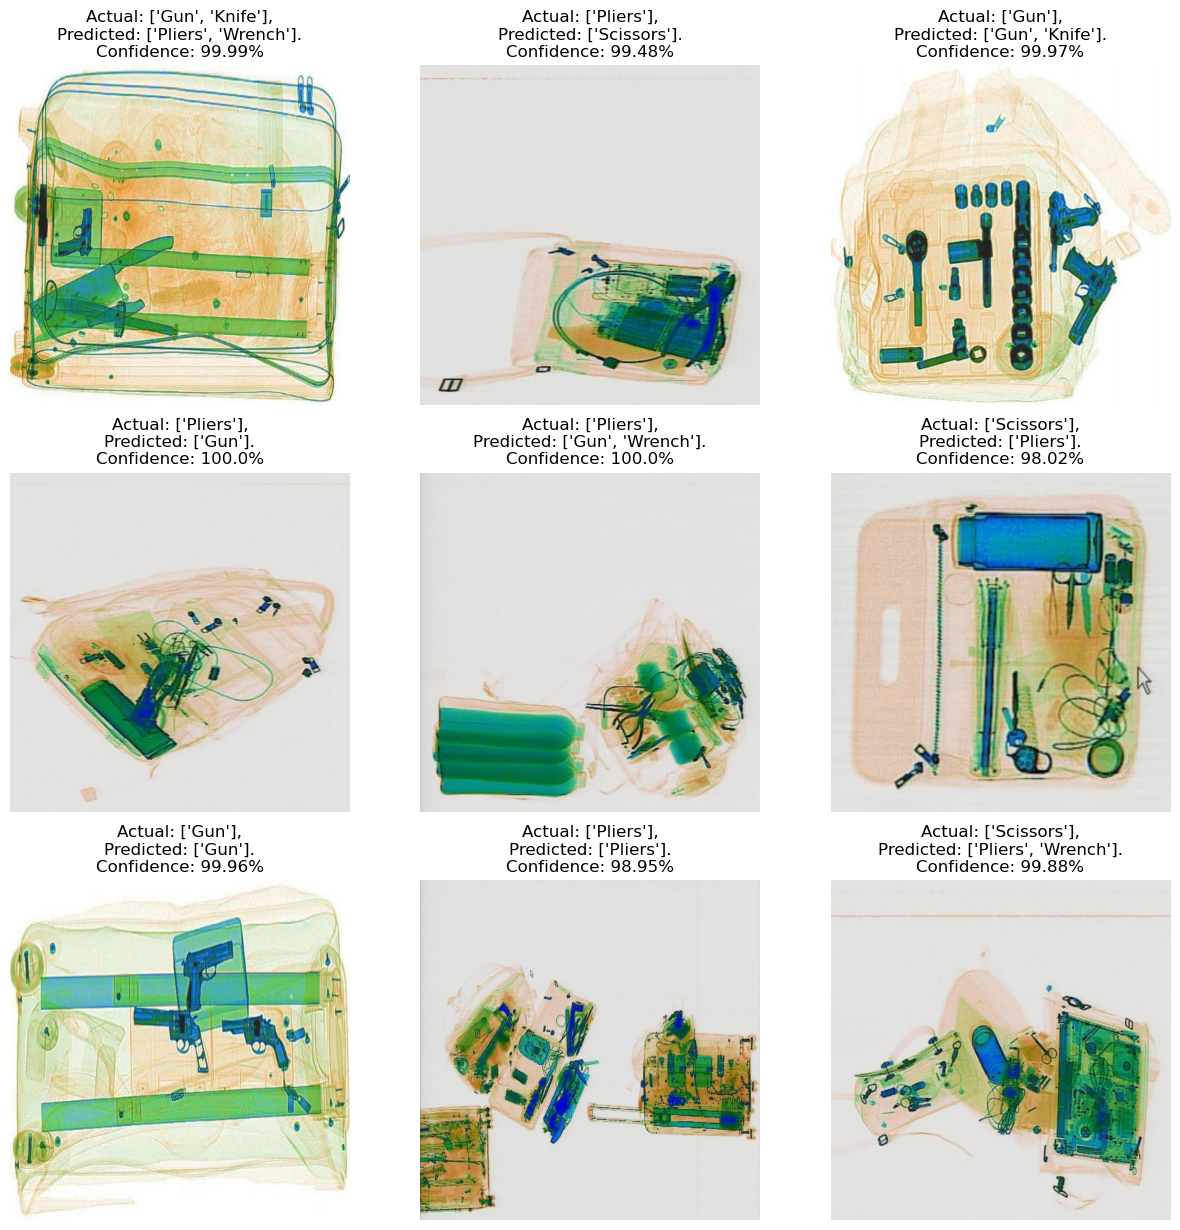

In [139]:
plt.figure(figsize=(15, 15))
for images, labels in new_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        
        confidence = round(100 * np.max(proba[i]), 2)
        predicted_labels = (proba[i] > 0.5).astype(int)
        
        true_labels = labels[i]
        true_labels_name = [class_names[j] for j, label in enumerate(true_labels) if label != 0]
        predicted_labels_name = [class_names[j] for j, label in enumerate(predicted_labels) if label != 0]
        
        plt.title(f"Actual: {true_labels_name},\nPredicted: {predicted_labels_name}.\nConfidence: {confidence}%")
        plt.axis("off")
plt.savefig('baggage4.png', bbox_inches='tight')
plt.show()

In [140]:
scores

[0.7808914184570312, 0.800000011920929]

In [141]:
history2

In [142]:
history2.params

{'verbose': 1, 'epochs': 50, 'steps': 182}

In [143]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [144]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

In [ ]:
len(history2.history['val_loss'])

50

In [ ]:
len(history2.history['val_loss'])

50

In [153]:
EPOCHS = 50

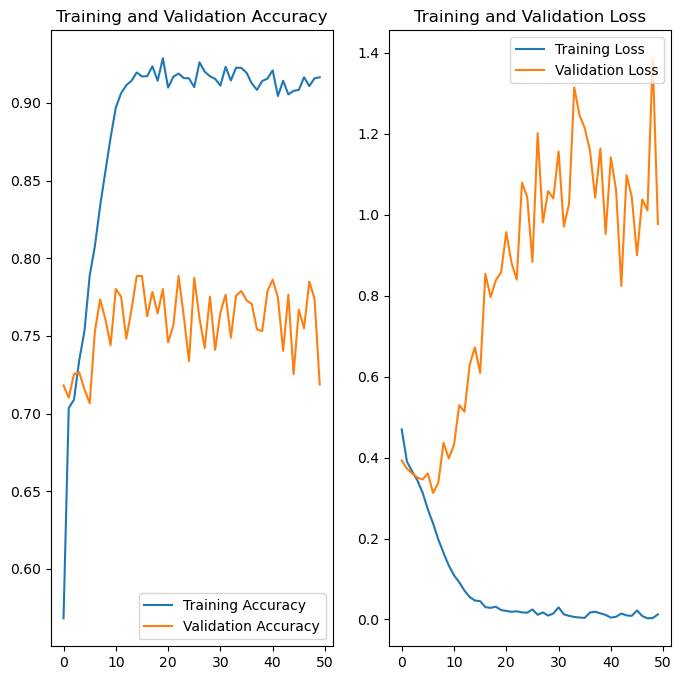

In [160]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [161]:
import os
#os.listdir("models")
model_version = max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"models/{model_version}")
model_version

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


1